***TASK 1 - Dataset Selection and Exploration***


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [5]:
df = pd.read_csv('ADANI_ENTERPRISES.csv')

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP
0,02-07-2002,1.386372,1.390971,1.356484,1.373344,-0.010540,1016147.0,1.373599667
1,03-07-2002,1.371811,1.387139,1.364914,1.373344,-0.010540,980394.0,1.375132333
2,04-07-2002,1.379475,1.401700,1.379475,1.381008,-0.010599,972747.0,1.387394333
3,05-07-2002,1.388672,1.388672,1.372578,1.377942,-0.010575,974496.0,1.379730667
4,08-07-2002,1.394803,1.454580,1.364914,1.438486,-0.011040,1061686.0,1.419326667
...,...,...,...,...,...,...,...,...
5217,19-06-2023,2504.000000,2521.600098,2350.000000,2401.399902,2401.399902,11475674.0,2424.333333
5218,20-06-2023,2435.000000,2435.000000,2390.000000,2414.800049,2414.800049,2479711.0,2413.266683
5219,21-06-2023,2426.699951,2440.000000,2393.100098,2405.949951,2405.949951,7418013.0,2413.016683
5220,22-06-2023,2425.100098,2449.949951,2360.000000,2397.250000,2397.250000,8459191.0,2402.399984


In [7]:
# Step 3: Parse Dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('Date')
df.dropna(subset=['Date'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [8]:
# Step 4: Dataset Overview
print("✅ Dataset Overview:")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("Date Range:", df['Date'].min(), "to", df['Date'].max())
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

✅ Dataset Overview:
Number of rows: 2055
Number of columns: 8
Date Range: 2002-01-08 00:00:00 to 2023-12-06 00:00:00

Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'VWAP']

Missing Values:
 Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
VWAP         0
dtype: int64

Data Types:
 Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
VWAP                 object
dtype: object


In [9]:
# Step 5: Summary Statistics
print("\n🔍 Summary Statistics:\n")
display(df.describe())


🔍 Summary Statistics:



,Date,Open,High,Low,Close,Adj Close,Volume
count,2055,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2.050000e+03
mean,2012-11-30 05:20:56.058394112,290.526083,296.666440,283.804859,290.506083,286.613243,7.138129e+06
min,2002-01-08 00:00:00,0.931145,0.931145,0.919650,0.919650,-0.011040,0.000000e+00
25%,2007-08-21 12:00:00,20.632739,21.197939,20.262963,20.604957,16.908681,1.658304e+06
50%,2012-12-04 00:00:00,53.118837,54.320680,51.414202,52.353012,46.357452,4.713343e+06
75%,2018-03-09 12:00:00,107.474554,109.218060,104.338165,107.167639,95.142238,8.513931e+06
max,2023-12-06 00:00:00,4044.000000,4094.000000,4003.350098,4031.800049,4031.800049,1.632565e+08
std,NaN,700.004977,712.569943,685.324620,699.641737,700.758672,9.976344e+06


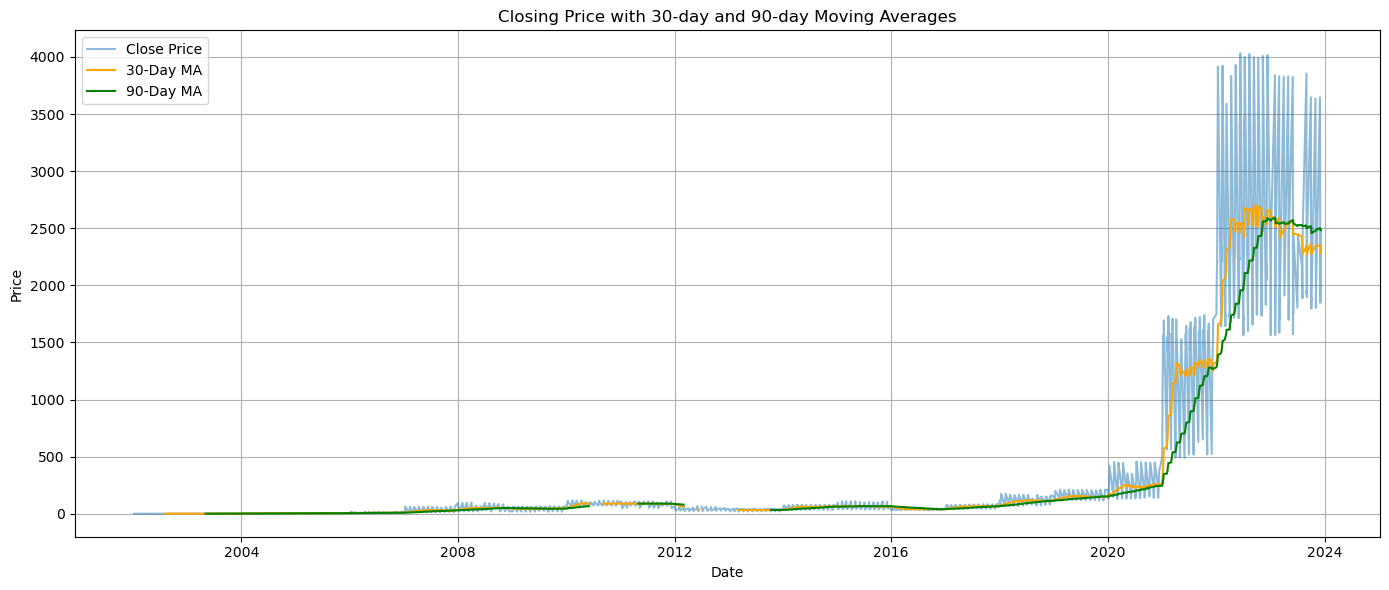

In [10]:
# Step 6: Time Series Plot - Closing Price
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['Date'], df['Close'].rolling(window=30).mean(), label='30-Day MA', color='orange')
plt.plot(df['Date'], df['Close'].rolling(window=90).mean(), label='90-Day MA', color='green')
plt.title('Closing Price with 30-day and 90-day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

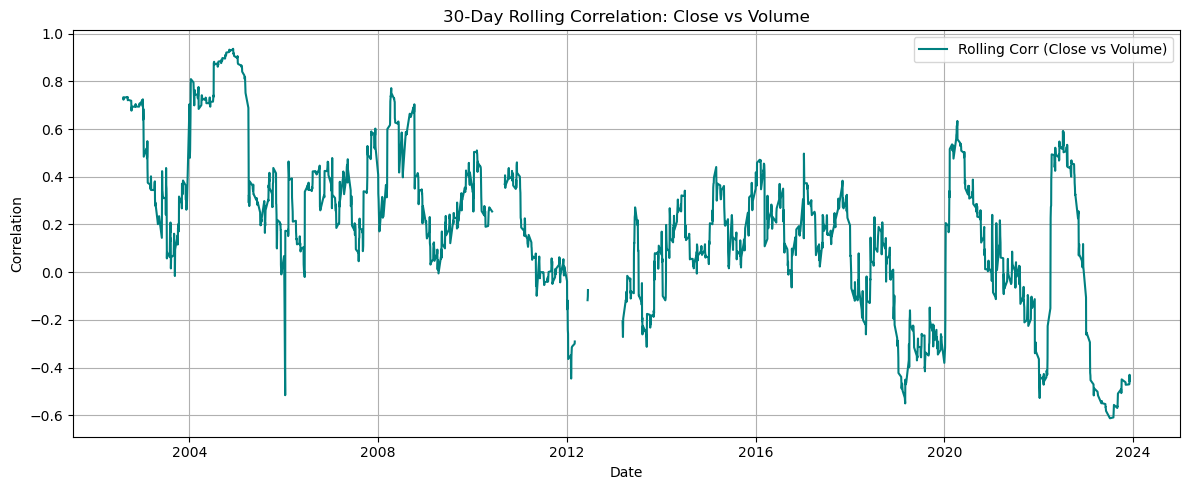

In [11]:
# Step 7: Correlation Heatmap between Close and Volume
rolling_corr = df['Close'].rolling(30).corr(df['Volume'])

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], rolling_corr, label='Rolling Corr (Close vs Volume)', color='teal')
plt.title("30-Day Rolling Correlation: Close vs Volume")
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

***TASK 2 - Data Preprocessing and Feature Engineering***

In [13]:
# Feature Engineering - Time Based Features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday
df['Day'] = df['Date'].dt.day
df['Is_Month_End'] = df['Date'].dt.is_month_end.astype(int)

In [14]:
# Derived Financial Indicators
# Price change from previous day
df['Price_Change'] = df['Close'].diff()

# Daily return as percentage
df['Daily_Return'] = df['Close'].pct_change()

# 7-day and 30-day Moving Averages
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

# Volatility: Rolling standard deviation of returns
df['Volatility_7'] = df['Daily_Return'].rolling(window=7).std()

C:\Users\jgand\AppData\Local\Temp\ipykernel_5668\2898122583.py:6: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Daily_Return'] = df['Close'].pct_change()


In [15]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Volume', 'Daily_Return', 'Volatility_7']].dropna())

In [16]:
# Step 1: Handle missing values and sort
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df = df.sort_values('Date').reset_index(drop=True)

In [17]:
# Step 2: Check for other missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Date              0
Open              5
High              5
Low               5
Close             5
Adj Close         5
Volume            5
VWAP              0
Year              0
Month             0
Weekday           0
Day               0
Is_Month_End      0
Price_Change     11
Daily_Return      1
MA_7             41
MA_30           160
Volatility_7      7
dtype: int64


In [18]:
# Step 3: Create time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday  # 0=Monday, 6=Sunday
df['Day'] = df['Date'].dt.day
df['Is_Month_End'] = df['Date'].dt.is_month_end.astype(int)

In [19]:
# Step 4: Feature engineering - stock indicators
df['Price_Change'] = df['Close'].diff()
df['Daily_Return'] = df['Close'].pct_change()
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['Volatility_7'] = df['Daily_Return'].rolling(window=7).std()

C:\Users\jgand\AppData\Local\Temp\ipykernel_5668\2555283963.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Daily_Return'] = df['Close'].pct_change()


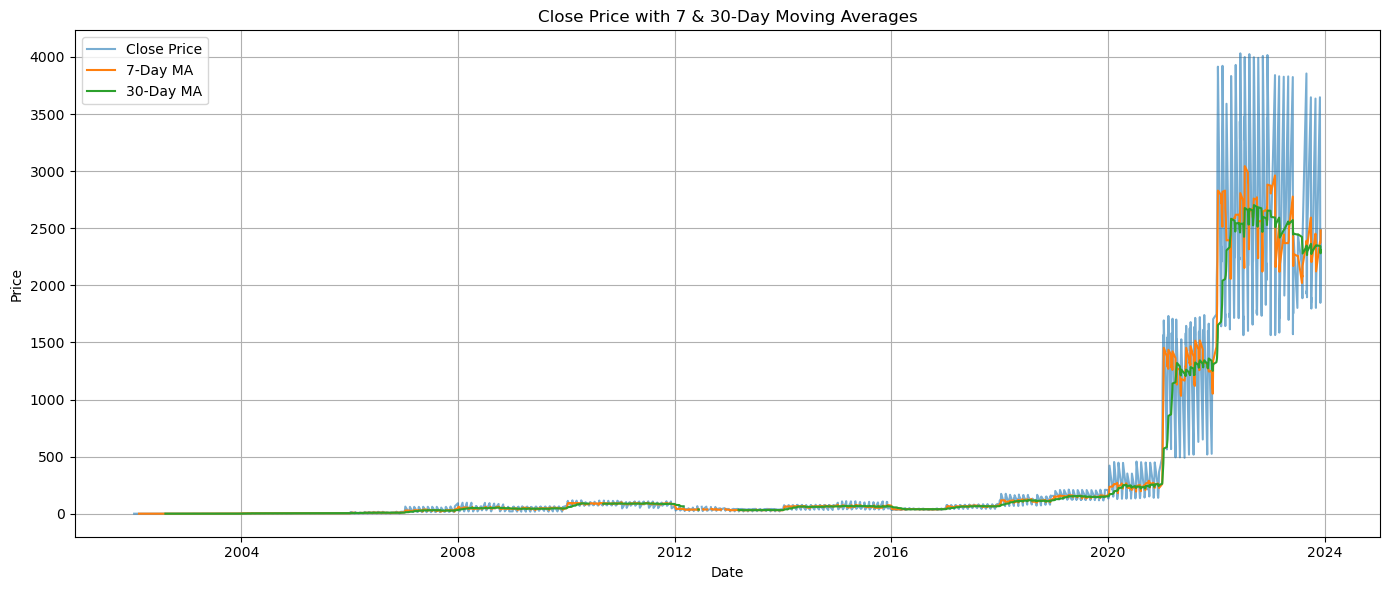

In [20]:
#Trend Visualization with Moving Averages
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.6)
plt.plot(df['Date'], df['MA_7'], label='7-Day MA')
plt.plot(df['Date'], df['MA_30'], label='30-Day MA')
plt.title("Close Price with 7 & 30-Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

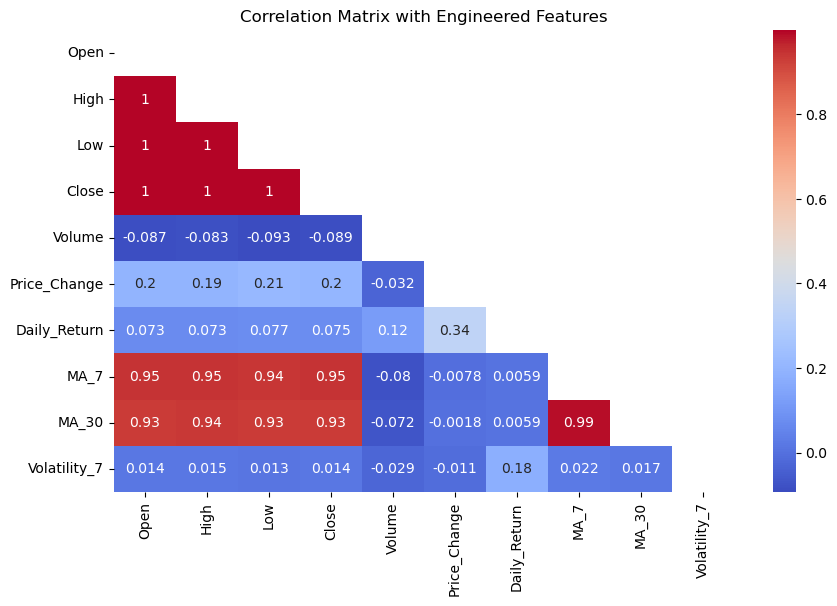

In [21]:
#Correlation Analysis
plt.figure(figsize=(10, 6))
corr = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Price_Change', 
           'Daily_Return', 'MA_7', 'MA_30', 'Volatility_7']].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix with Engineered Features")
plt.show()

In [22]:
scaler = StandardScaler()
to_scale = ['Volume', 'Daily_Return', 'Volatility_7']
scaled_data = df[to_scale].dropna()

scaled_features = scaler.fit_transform(scaled_data)

In [23]:
# Store in new DataFrame for modeling
scaled_df = pd.DataFrame(scaled_features, columns=[f'{col}_scaled' for col in to_scale])
scaled_df.head()

,Volume_scaled,Daily_Return_scaled,Volatility_7_scaled
0,-0.680894,0.222265,-0.719533
1,-0.619013,0.271063,-0.759763
2,-0.667828,-0.501739,-0.696983
3,-0.665712,-0.541368,-0.899057
4,-0.686306,0.224744,-0.856107


***TASK 3- Regression Model Development and Evaluation***

In [25]:
# Drop rows with NaN after feature engineering
df_model = df.dropna(subset=['Price_Change', 'Daily_Return', 'MA_7', 'MA_30', 'Volatility_7'])

In [26]:
# Features and Target
features = ['Open', 'High', 'Low', 'Volume', 'Price_Change', 'Daily_Return', 'MA_7', 'MA_30', 'Volatility_7', 'Weekday', 'Month']
target = 'Close'

In [27]:
X = df_model[features]
y = df_model[target]

In [28]:
# First split into train + test (80/20)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [29]:
# Further split train into train + validation (80/20 of remaining)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, shuffle=False)

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_val)

In [31]:
# Evaluation
mse_lr = mean_squared_error(y_val, y_pred_lr)
mae_lr = mean_absolute_error(y_val, y_pred_lr)
r2_lr = r2_score(y_val, y_pred_lr)

In [32]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)

In [33]:
# Evaluation
mse_rf = mean_squared_error(y_val, y_pred_rf)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

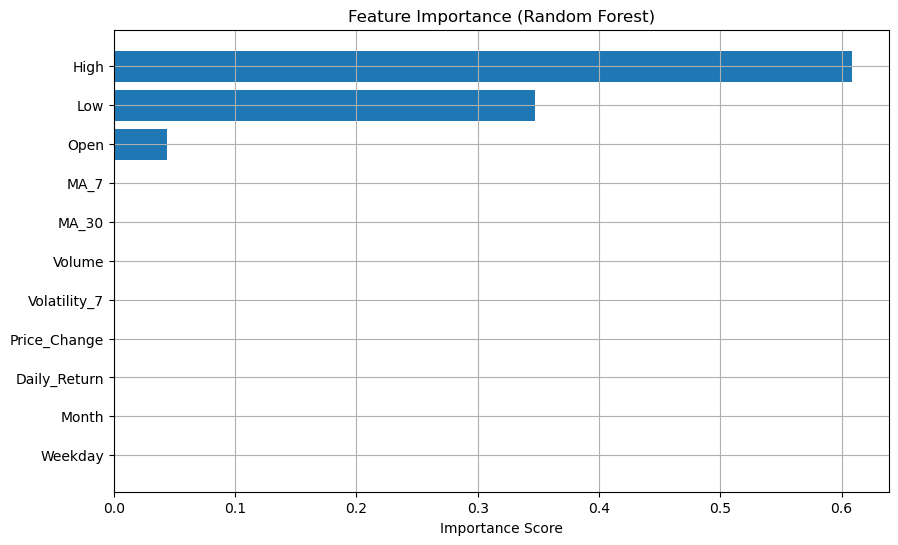

In [34]:
importances = rf.feature_importances_
indices = sorted(range(len(importances)), key=lambda k: importances[k], reverse=True)
features_sorted = [features[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.barh(features_sorted, [importances[i] for i in indices])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

In [69]:
# Final test performance on Random Forest
final_predictions = rf.predict(X_test)

mse_final = mean_squared_error(y_test, final_predictions)
mae_final = mean_absolute_error(y_test, final_predictions)
r2_final = r2_score(y_test, final_predictions)